In [91]:
from typing import List
from random import choice

import networkx as nx
import matplotlib.pyplot as plt

In [92]:
class Graph:
    def __init__(self, n: int = 5):
        self.double_n = n * n
        self.n = n
        self._create_edges()

    def _create_edges(self): 
        self.adjList: List[list] = [[] for _ in range(self.double_n)]

        for src in range(self.double_n):
            for dest in range(self.double_n):
                if abs(dest - src) == self.n:
                    self.adjList[src].append(dest)
                if abs(dest - src) == 1:
                    if (src % self.n == 0 and (dest + 1) % self.n == 0) or (dest % self.n == 0 and (src + 1) % self.n == 0):
                        continue
                    self.adjList[src].append(dest)
    
    def get_adjList(self):
        return {point: tuple(connections) for point, connections in enumerate(self.adjList)}

    def delete_edges(self, delete_n: int):
        if delete_n > self.double_n - 1:
            raise Exception('Delete number must be less than number of edges - 1')
        for _ in range(delete_n):
            while True:
                point = choice(range(len(self.adjList)))
                connected_point = choice(self.adjList[point])
                adjList_copy = self.adjList.copy()
                self.adjList[point].remove(connected_point)
                self.adjList[connected_point].remove(point)
                if self.isStronglyConnected():
                    print(point, connected_point)
                    break
                self.adjList = adjList_copy
    
    def _DFS(self, v, visited):
        visited[v] = True
        for u in self.adjList[v]:
            if not visited[u]:
                self._DFS(u, visited)

    def isStronglyConnected(self):
        for i in range(self.double_n):
            visited = [False] * self.double_n
            self._DFS(i, visited)
            for b in visited:
                if not b:
                    return False
    
        return True

In [93]:
n = 4

In [94]:
graph = Graph(n)

In [95]:
graph.adjList

[[1, 4],
 [0, 2, 5],
 [1, 3, 6],
 [2, 7],
 [0, 5, 8],
 [1, 4, 6, 9],
 [2, 5, 7, 10],
 [3, 6, 11],
 [4, 9, 12],
 [5, 8, 10, 13],
 [6, 9, 11, 14],
 [7, 10, 15],
 [8, 13],
 [9, 12, 14],
 [10, 13, 15],
 [11, 14]]

In [96]:
edges_dict = graph.get_adjList()
edges_dict

{0: (1, 4),
 1: (0, 2, 5),
 2: (1, 3, 6),
 3: (2, 7),
 4: (0, 5, 8),
 5: (1, 4, 6, 9),
 6: (2, 5, 7, 10),
 7: (3, 6, 11),
 8: (4, 9, 12),
 9: (5, 8, 10, 13),
 10: (6, 9, 11, 14),
 11: (7, 10, 15),
 12: (8, 13),
 13: (9, 12, 14),
 14: (10, 13, 15),
 15: (11, 14)}

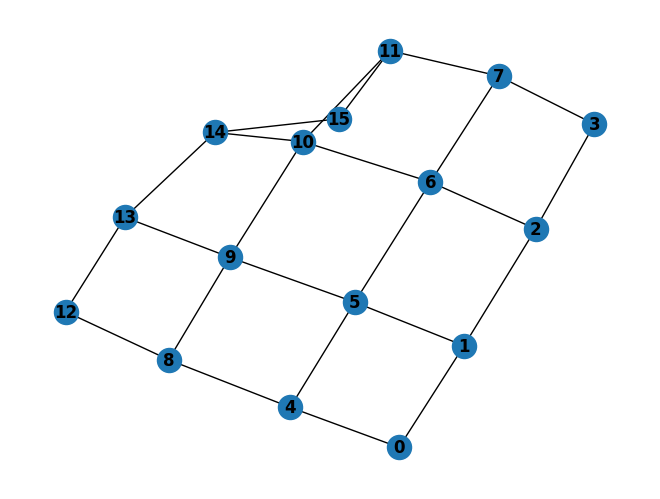

In [97]:
H = nx.Graph(edges_dict)
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

In [98]:
graph.isStronglyConnected()

True

In [99]:
graph.delete_edges(5)

4 5
1 0
9 13
1 5
6 7


In [100]:
edges_dict = graph.get_adjList()
edges_dict

{0: (4,),
 1: (2,),
 2: (1, 3, 6),
 3: (2, 7),
 4: (0, 8),
 5: (6, 9),
 6: (2, 5, 10),
 7: (3, 11),
 8: (4, 9, 12),
 9: (5, 8, 10),
 10: (6, 9, 11, 14),
 11: (7, 10, 15),
 12: (8, 13),
 13: (12, 14),
 14: (10, 13, 15),
 15: (11, 14)}

In [101]:
H = nx.Graph(edges_dict)

In [102]:
list(H.edges())

[(0, 4),
 (1, 2),
 (2, 3),
 (2, 6),
 (3, 7),
 (4, 8),
 (5, 6),
 (5, 9),
 (6, 10),
 (7, 11),
 (8, 9),
 (8, 12),
 (9, 10),
 (10, 11),
 (10, 14),
 (11, 15),
 (12, 13),
 (13, 14),
 (14, 15)]

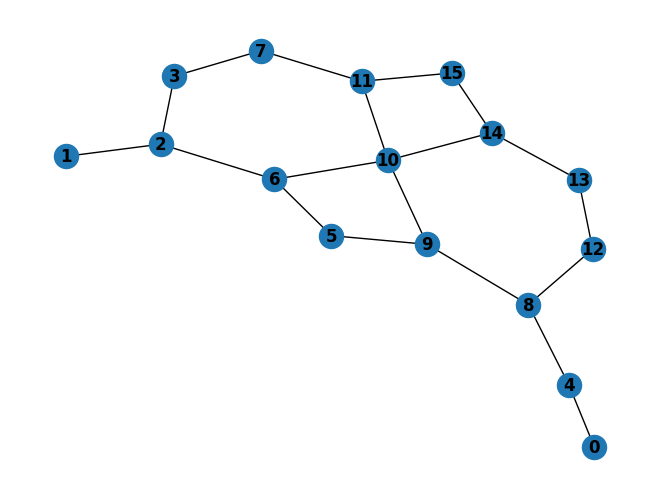

In [103]:
nx.draw(H, with_labels=True, font_weight='bold')
plt.show()  


In [104]:
G = nx.grid_graph([5, 5])

In [105]:
list(G.edges())

[((0, 0), (1, 0)),
 ((0, 0), (0, 1)),
 ((0, 1), (1, 1)),
 ((0, 1), (0, 2)),
 ((0, 2), (1, 2)),
 ((0, 2), (0, 3)),
 ((0, 3), (1, 3)),
 ((0, 3), (0, 4)),
 ((0, 4), (1, 4)),
 ((1, 0), (2, 0)),
 ((1, 0), (1, 1)),
 ((1, 1), (2, 1)),
 ((1, 1), (1, 2)),
 ((1, 2), (2, 2)),
 ((1, 2), (1, 3)),
 ((1, 3), (2, 3)),
 ((1, 3), (1, 4)),
 ((1, 4), (2, 4)),
 ((2, 0), (3, 0)),
 ((2, 0), (2, 1)),
 ((2, 1), (3, 1)),
 ((2, 1), (2, 2)),
 ((2, 2), (3, 2)),
 ((2, 2), (2, 3)),
 ((2, 3), (3, 3)),
 ((2, 3), (2, 4)),
 ((2, 4), (3, 4)),
 ((3, 0), (4, 0)),
 ((3, 0), (3, 1)),
 ((3, 1), (4, 1)),
 ((3, 1), (3, 2)),
 ((3, 2), (4, 2)),
 ((3, 2), (3, 3)),
 ((3, 3), (4, 3)),
 ((3, 3), (3, 4)),
 ((3, 4), (4, 4)),
 ((4, 0), (4, 1)),
 ((4, 1), (4, 2)),
 ((4, 2), (4, 3)),
 ((4, 3), (4, 4))]

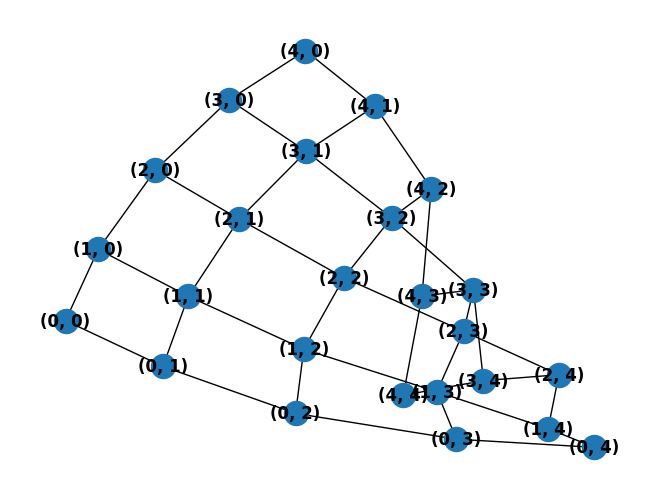

In [106]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show() 

In [107]:
G.remove_edge((0, 2), (0, 1))

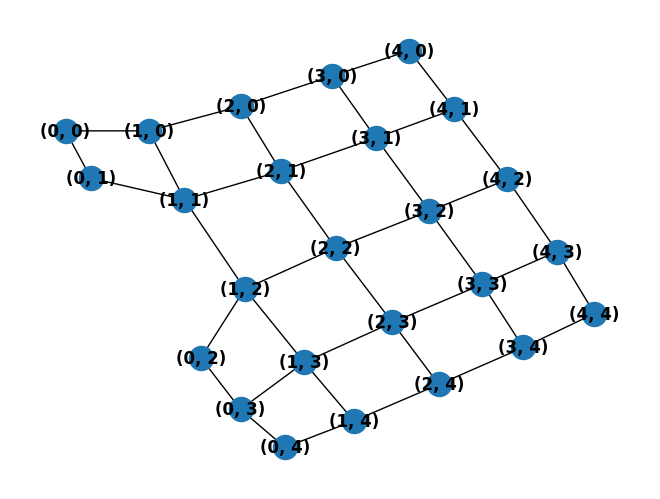

In [108]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show() 

In [109]:
G.remove_edge((3, 0), (3, 1))

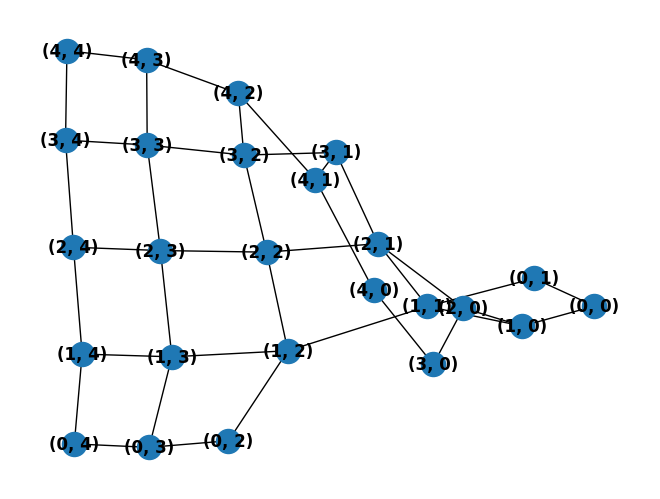

In [110]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show() 